<a href="https://colab.research.google.com/github/karentutor/NLP/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pandas: Used for data manipulation and analysis.
#seaborn and matplotlib.pyplot: Used for data visualization.

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# LOAD THE DATASET

# Define the path to the dataset
train_data_path = '/content/drive/My Drive/ML/twitter_training.csv'

# Load dataset with specified column names
import pandas as pd
twitter_data = pd.read_csv(train_data_path, names=['Id', 'Company', 'Sentiment', 'Tweet'])
twitter_data.head() # display first 5 rows
twitter_data.tail() # display last 5 rows




Mounted at /content/drive


,Id,Company,Sentiment,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


**Understanding the Code and Its Workflow**

**Data Loading and Exploration**
Objective: To load the dataset and get an initial understanding of its
structure and contents.
Key Actions:
Loaded the dataset from Google Drive.
Examined the data for missing values and class distribution.
Visualized the sentiment distribution to understand class imbalance.

**Data Preprocessing**

Objective: To clean the text data and prepare it for modeling.
Key Actions:
Removed irrelevant text components like URLs, mentions, and special characters.
Converted text to lowercase for consistency.
Tokenized the text to break it down into individual words.
Removed stopwords and applied stemming to reduce words to their root form.

**Feature Extraction**

Objective: To transform the textual data into numerical features that machine learning models can interpret.
Key Actions:
Used TF-IDF vectorization to represent the importance of words in the corpus.
Limited the feature space to the top 5000 words to manage dimensionality.
**Data Visualization**

Objective: To gain insights into the data and the features extracted.
Key Actions:
Displayed the top 20 features based on their TF-IDF scores.
Created a word cloud to visualize the most frequent words in the dataset.

**Model Training**

Objective: To train a machine learning model that can classify the sentiment of tweets.
Key Actions:
Initialized and trained a Logistic Regression model.
Also experimented with an SGDClassifier as an alternative.
Performed cross-validation to assess the model's performance.

**Model Evaluation**

Objective: To evaluate the trained model's performance and understand its predictive capabilities.
Key Actions:
Calculated cross-validation scores to estimate accuracy.
Generated a confusion matrix to visualize the model's performance across different classes.
Produced a classification report to obtain detailed metrics for each class.

**Model Interpretation**

Objective: To understand which features are most influential in the model's predictions.
Key Actions:
Extracted the model's coefficients to see the weight assigned to each feature.
Visualized the top features for each sentiment class using bar plots.

**Key Takeaways**

**Data Preprocessing is Crucial: Cleaning and preparing the data significantly impact the model's performance.**

Feature Engineering Matters: Choosing the right features and limiting the feature space helps in building efficient models.
Model Selection and Evaluation: Trying different models and evaluating them thoroughly ensures that you select the most suitable one for your task.
Interpretability: Understanding the model's decision-making process is essential, especially when dealing with text data.
Suggestions for Further Improvement

Experiment with Different Models: Try other algorithms like Support Vector Machines or Random Forests to see if they offer better performance.
Hyperparameter Tuning: Use techniques like Grid Search to find the optimal parameters for your models.
Handle Class Imbalance: If the sentiment classes are imbalanced, consider techniques like resampling or adjusting class weights.
Advanced NLP Techniques: Incorporate lemmatization, n-grams, or word embeddings for richer feature representations.
Model Deployment: Save your trained model and vectorizer for future use or deploy them in a real-world application.


In [4]:
twitter_data['Sentiment'].value_counts()


,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [5]:
## lets do some formalities by checking size/ columns/ missing values

# Understand data dimensions
shape = twitter_data.shape
print(f"Rows in dataset are : {shape[0]}")
print(f"Columns in dataset are : {shape[1]}")

twitter_data.isnull().sum()

Rows in dataset are : 74682
Columns in dataset are : 4


,0
Id,0
Company,0
Sentiment,0
Tweet,686


Missing values in each column:
Id             0
Company        0
Sentiment      0
Tweet        686
dtype: int64
Sentiment distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
Number of missing tweets: 686


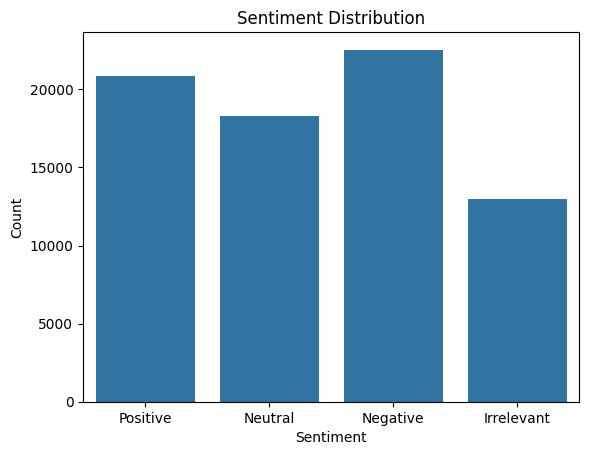

In [6]:
# Check for missing values
print("Missing values in each column:")
print(twitter_data.isnull().sum())

# Understand the sentiment distribution
print("Sentiment distribution:")
print(twitter_data['Sentiment'].value_counts())

# Check for missing values in 'Tweet' column
missing_tweets = twitter_data['Tweet'].isnull().sum()
print(f"Number of missing tweets: {missing_tweets}")


# Plot the sentiment distribution
# Visusalising sentiment distribution
sns.countplot(x='Sentiment', data=twitter_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## STEP 2 : DATA PREPOSSING


In [7]:
# Drop rows with missing 'Tweet' values
# Handling missing values
twitter_data = twitter_data.dropna(subset=['Tweet'])


In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Importing libraries
#re: Regular expressions library for text manipulation.
#nltk: Natural Language Toolkit, used for various NLP tasks.
#stopwords: Common words that may not be useful for analysis (e.g., "the", "and").
#PorterStemmer: Algorithm for stemming words to their root form.
#ps: An instance of the PorterStemmer.
#stop_words: A set of English stopwords.

# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Defining the prepossing function

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'Tweet' column -- using the funciton above
# apply(preprocess_text): Applies the preprocessing function to each tweet.
# Adding 'Cleaned_Tweet' Column: Stores the preprocessed text for further analysis.
# Displaying the Results: Shows a comparison of original and cleaned tweets.

twitter_data['Cleaned_Tweet'] = twitter_data['Tweet'].apply(preprocess_text)

# Display the original and cleaned tweets
twitter_data[['Tweet', 'Cleaned_Tweet']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet,Cleaned_Tweet
0,im getting on borderlands and i will murder yo...,im get borderland murder
1,I am coming to the borders and I will kill you...,come border kill
2,im getting on borderlands and i will kill you ...,im get borderland kill
3,im coming on borderlands and i will murder you...,im come borderland murder
4,im getting on borderlands 2 and i will murder ...,im get borderland murder


## FEATURE EXTRACTION : STEP 3

In [9]:
# FEATURE extraction step 3
# Convert the cleaned text into numerical features using TF-IDF Vectorization.

#TF-IDF Vectorizer: Converts text data into numerical features based on word importance.
#max_features: Limits the number of features to the top 5000 words.
#X: Feature matrix.
#y: Target variable (Sentiment labels).

# Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with a maximum of 5000 features
# Initializing and Applying the Vectorizer

#max_features=5000: Limits the number of features to the top 5000 terms based on frequency.


vectorizer = TfidfVectorizer(max_features=5000)

#fit_transform: Learns the vocabulary and computes the TF-IDF matrix.
# Fit and transform the cleaned tweets
X = vectorizer.fit_transform(twitter_data['Cleaned_Tweet'])

# Extract the target variable
# y: Stores the sentiment labels corresponding to each tweet.
y = twitter_data['Sentiment']


## DATA VISUALISATION: STEP 4

In [10]:
# Get feature names and their corresponding TF-IDF scores

# X.sum(axis=0): Sums the TF-IDF scores for each feature across all documents.
# Creating tfidf_df: A DataFrame containing features and their aggregated TF-IDF scores.
# Sorting and Displaying: Shows the most important words based on TF-IDF scores.

#. A. Displaying Top TF-IDF Features
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0)

# Create a DataFrame of features and their TF-IDF scores
import numpy as np
tfidf_scores = np.array(tfidf_scores).flatten()
tfidf_df = pd.DataFrame({'feature': feature_names, 'tfidf_score': tfidf_scores})

# Sort the DataFrame by TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values(by='tfidf_score', ascending=False)

# Display the top 20 features
print("Top 20 TF-IDF Features:")
print(tfidf_df.head(20))


Top 20 TF-IDF Features:
     feature  tfidf_score
1782    game  1634.417012
3243    play  1214.893732
1752    fuck  1123.023979
2163      im   983.735217
2581    love   972.935397
1821     get   966.652391
2523    like   959.279376
1868    good   863.686694
1854      go   777.210782
3904    shit   748.096337
3026     one   737.618745
4437    time   720.251841
4363   thank   720.003206
2569    look   694.486274
3519  realli   693.720936
3831     see   673.625732
2916     new   659.727667
417     best   654.177285
643     cant   645.841788
4628     unk   617.416652


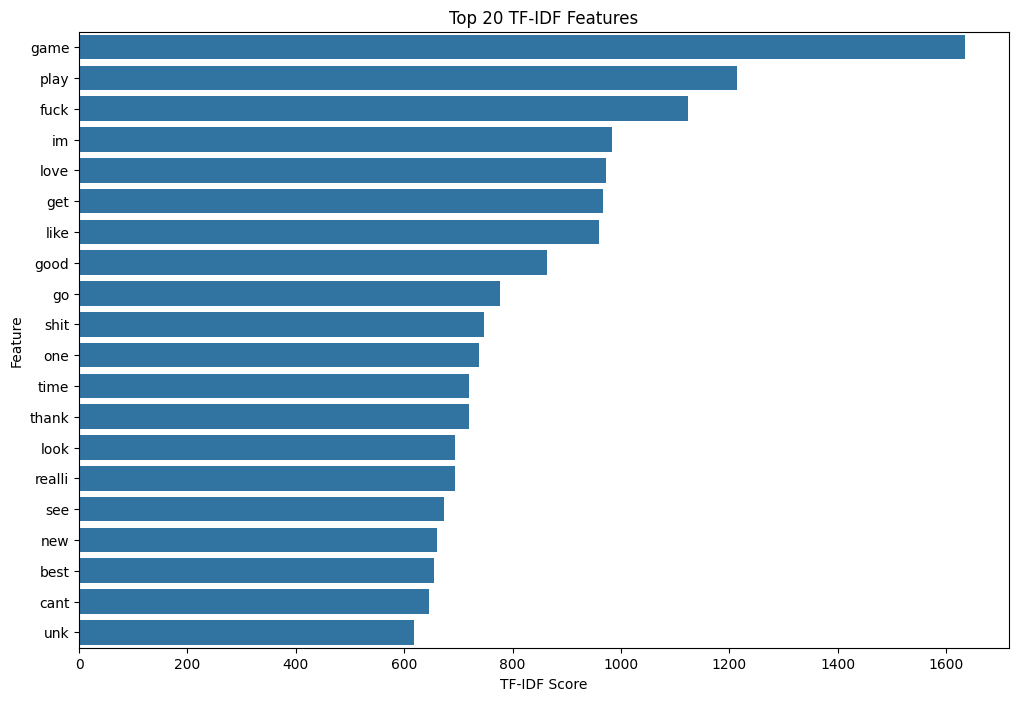

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Top TF-IDF Features

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='tfidf_score', y='feature', data=tfidf_df.head(20))
plt.title('Top 20 TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()


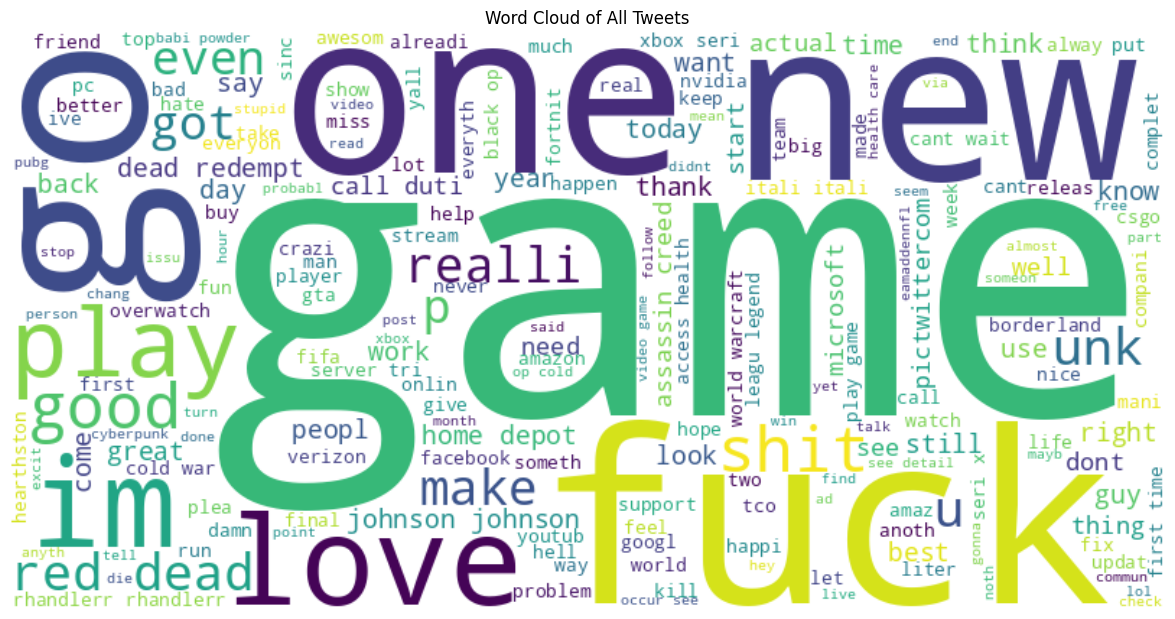

In [12]:
from wordcloud import WordCloud

# Generating a word cloud

# Combine all cleaned tweets into one string
text = ' '.join(twitter_data['Cleaned_Tweet'])

# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()

## MODEL TRAINING : STEP 5

In [16]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model

# max_iter=1000: Sets the maximum number of iterations for the solver to converge.
# solver='saga': Suitable for large datasets and supports L1 regularization.
model = LogisticRegression(max_iter=1000, solver='saga')

# Training the Model: The model learns from the feature matrix X and target variable y.
# Fit the model on the entire dataset
model.fit(X, y)


LogisticRegression(max_iter=1000, solver='saga')

In [17]:
from sklearn.model_selection import cross_val_score

# Alternative Model: SGDClassifier

# SGDClassifier: An alternative linear model that uses stochastic gradient descent.
#loss='log_loss': Specifies logistic regression.
# Advantages: Handles large datasets efficiently and works well with sparse data.

from sklearn.linear_model import SGDClassifier

# CROSS VALIDATION

#cross_val_score: Evaluates the model using cross-validation.
#cv=5: Uses 5-fold cross-validation.
#scoring='accuracy': Evaluates the model based on accuracy metric.
# Results: Provides an estimate of the model's performance on unseen data.


# Initialize the SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())



Cross-validation scores: [0.51283784 0.46928847 0.42705588 0.39745929 0.49814177]
Mean cross-validation accuracy: 0.46095664791083407


## MODEL EVALUATIONS : STEP 6

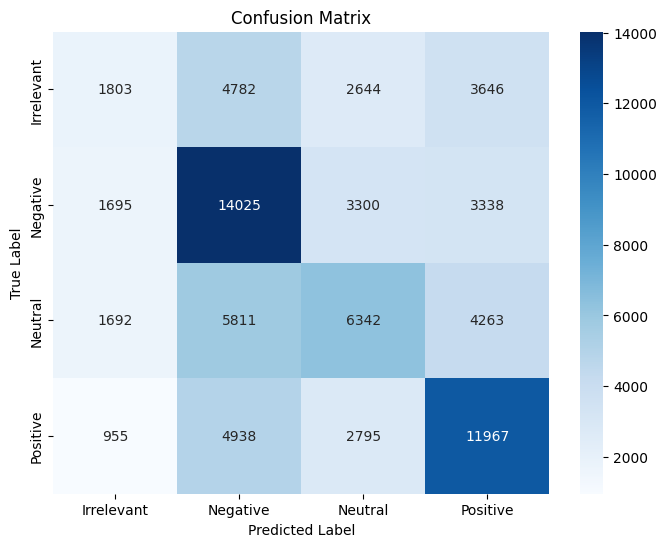

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the sentiments using cross-validation predictions
from sklearn.model_selection import cross_val_predict

# cross_val_predict: Generates cross-validated predictions.
# confusion_matrix: Computes the confusion matrix to evaluate the accuracy of classifications.
# Visualization: Heatmap to display the confusion matrix.

# Get cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Get the unique class labels from y
labels = np.unique(y)

# Compute the confusion matrix using the labels from y
conf_matrix = confusion_matrix(y, y_pred, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# classification_report: Provides detailed metrics (precision, recall, F1-score) for each class.
#ross_val_predict: Generates cross-validated predictions.
# classification_report: Generates a classification report.

# Get cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Generate the classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.29      0.14      0.19     12875
    Negative       0.47      0.63      0.54     22358
     Neutral       0.43      0.35      0.38     18108
    Positive       0.52      0.58      0.55     20655

    accuracy                           0.46     73996
   macro avg       0.43      0.42      0.41     73996
weighted avg       0.44      0.46      0.44     73996



## MODEL INTERPRETATION : STEP 7

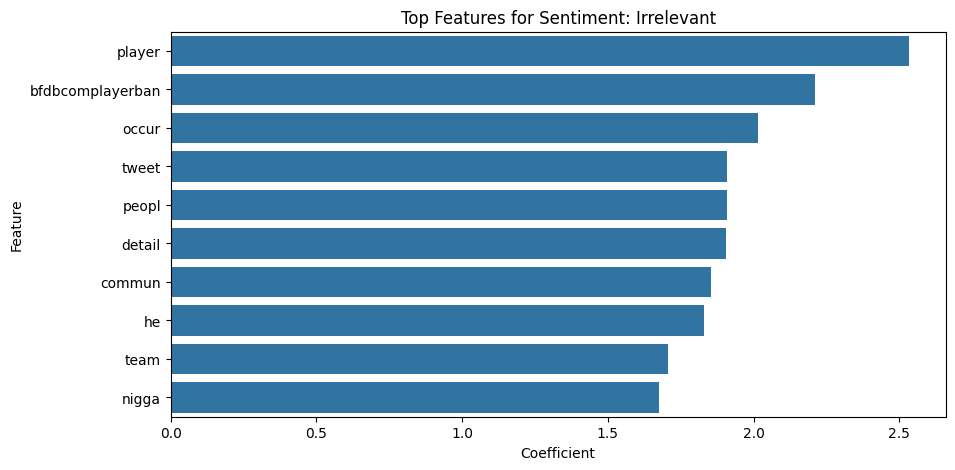

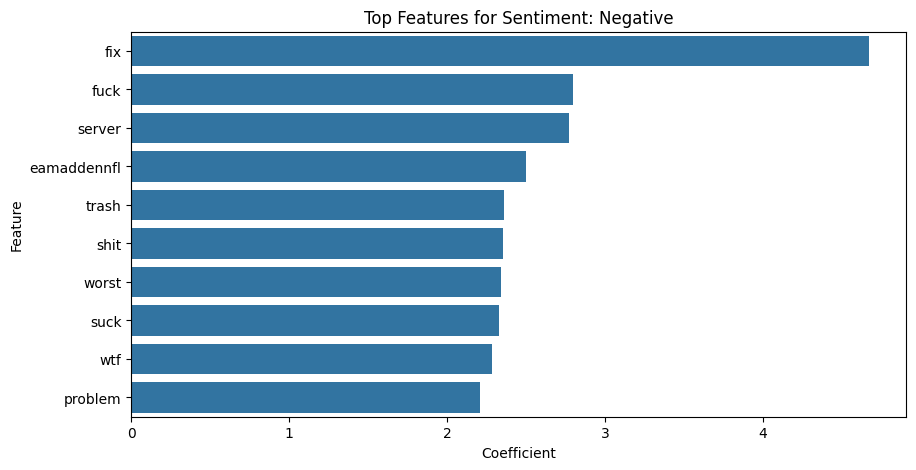

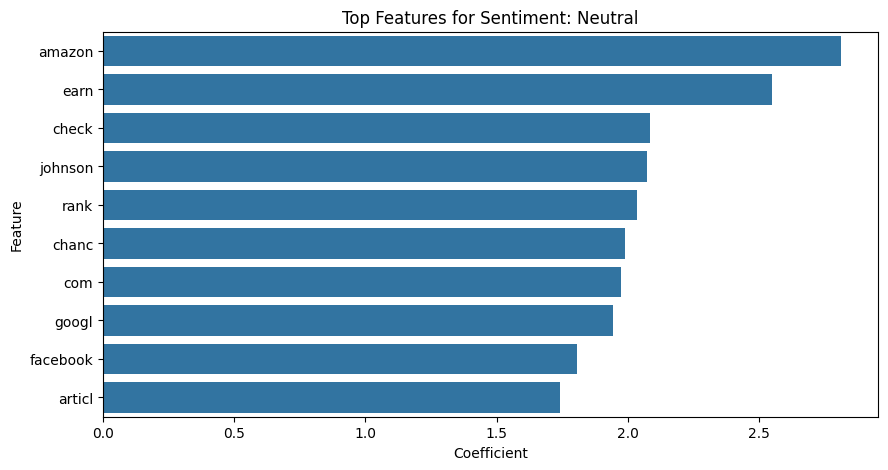

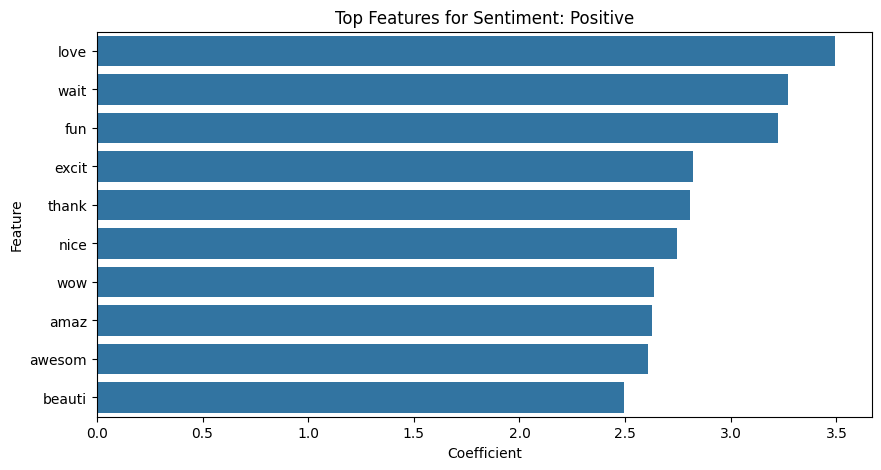

In [22]:
# Fit the model on the entire dataset

# model.coef_: Retrieves the coefficients (weights) assigned to each feature by the model.
# Interpreting Coefficients: Higher positive coefficients indicate a stronger association with the class.
# Visualization: Bar plots showing the top features influencing each sentiment class.

model.fit(X, y)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Top Features for Each Class
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# For each class, visualize the top features - visualise the coefficients
for idx, class_label in enumerate(model.classes_):
    coef = coefficients[idx]
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coef
    })
    # Get top positive coefficients
    top_features = coef_df.sort_values(by='coefficient', ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='coefficient', y='feature', data=top_features)
    plt.title(f'Top Features for Sentiment: {class_label}')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()
